In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [344]:
df = pd.read_csv('titanic/train.csv')
dft = pd.read_csv('titanic/test.csv')
dftr = pd.read_csv('titanic/gender_submission.csv')
dft = pd.merge(dft, dftr, on='PassengerId')
df = pd.concat([df, dft], ignore_index=True)
df['Fare'] = df['Fare'].fillna(15.0)




In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [347]:
df['Cabin'] = df['Cabin'].fillna('No Cabin')
df['Embarked'] = df['Embarked'].fillna('C')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['FamilySize'] = df['SibSp']+df['Parch']+1
df['Price'] = df['Fare']/df['FamilySize']
df['TicketPrefix'] = df['Ticket'].str.extract(r'^([A-Za-z\.\/]+)')
df['TicketPrefix'] = df['TicketPrefix'].fillna('None')
df['TicketPrefix'] = (
    df['TicketPrefix']
    .str.replace(r'[./\s]', '', regex=True)  # removes ., /, and whitespace
    .str.upper()                            # capitalizes all letters
)
df.info()
#SOUTHHAMPTON ENGLAND
#CHERBOURG FRANCE
#QUEENSTOWN IR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      1309 non-null   int64  
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1309 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1309 non-null   float64
 10  Cabin         1309 non-null   object 
 11  Embarked      1309 non-null   object 
 12  FamilySize    1309 non-null   int64  
 13  Price         1309 non-null   float64
 14  TicketPrefix  1309 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


In [348]:
dfanalysis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Price,TicketPrefix,CabinPrefix,TicketNumber,Surname,FamilyID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S,2,3.625000,A,None,21171,Braund,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,35.641650,PC,C,17599,Cumings,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S,1,7.925000,STONO,None,3101282,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,26.550000,NONE,C,113803,Futrelle,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S,1,8.050000,NONE,None,373450,Allen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,No Cabin,S,1,8.050000,A,None,3236,Spector,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1,108.900000,PC,C,17758,Oliva y Ocana,NaN
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,No Cabin,S,1,7.250000,SOTONOQ,None,3101262,Saether,NaN
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,No Cabin,S,1,8.050000,NONE,None,359309,Ware,NaN


In [349]:
dfanalysis = df
df['TicketNumber'] = df['Ticket'].str.extract(r'(\d+)(?!.*\d)')
#dfanalysis =df[['PassengerId','Cabin','Age','Sex','Fare','Ticket','Name','SibSp','Parch','Pclass','FamilySize','Price','Embarked','TicketPrefix','TicketNumer']]

def extract_cabin_prefix(cabin):
    if pd.isna(cabin) or cabin == 'No Cabin':
        return 'None'
    return ''.join([ch for ch in cabin if ch.isalpha()])  # Extract only letters

dfanalysis['CabinPrefix'] = dfanalysis['Cabin'].apply(extract_cabin_prefix)


xcolm = ['CabinPrefix','Embarked','FamilySize','Pclass','Sex', 'Age']
xfare = dfanalysis[xcolm]
yfare = dfanalysis['Price']
xfare

,CabinPrefix,Embarked,FamilySize,Pclass,Sex,Age
0,None,S,2,3,male,22.000000
1,C,C,2,1,female,38.000000
2,None,S,1,3,female,26.000000
3,C,S,2,1,female,35.000000
4,None,S,1,3,male,35.000000
...,...,...,...,...,...,...
1304,None,S,1,3,male,29.881138
1305,C,C,1,1,female,39.000000
1306,None,S,1,3,male,38.500000
1307,None,S,1,3,male,29.881138


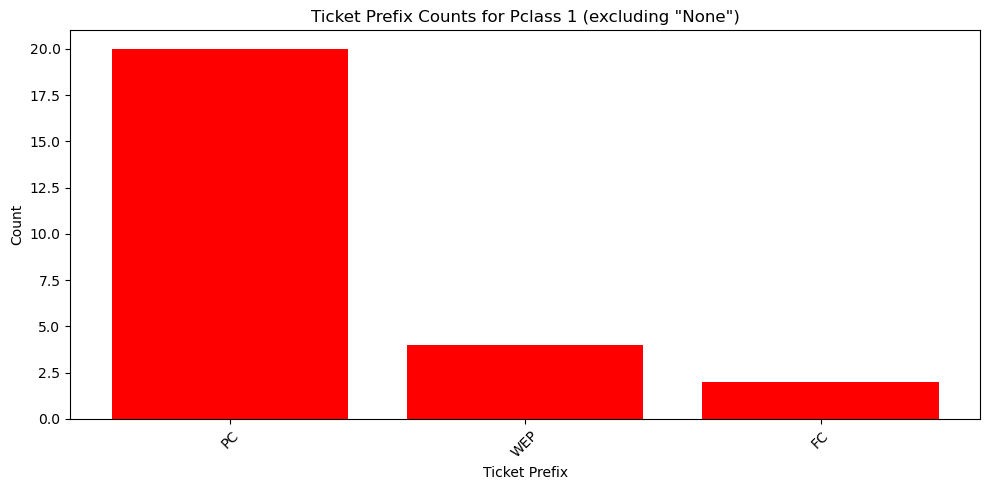

In [312]:
import matplotlib.pyplot as plt

# Filter for Pclass 1 and exclude "None" prefixes
dfindex = dfanalysis[(dfanalysis['Pclass'] == 1) & (dfanalysis['Embarked']=='S') & (dfanalysis['TicketPrefix'] != 'NONE')]['TicketPrefix'].value_counts()

# Plot
plt.figure(figsize=(10,5))
plt.bar(dfindex.index, dfindex.values, color='red')
plt.xlabel('Ticket Prefix')
plt.ylabel('Count')
plt.title('Ticket Prefix Counts for Pclass 1 (excluding "None")')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [313]:
dfanalysis[(dfanalysis['Pclass'] == 2) & (dfanalysis['TicketPrefix'] != 'NONE')]['TicketPrefix'].value_counts()


CA         33
SCPARIS    19
FCC         9
SOC         8
WC          5
SCAH        5
SOPP        4
SWPP        2
PPP         2
SC          2
SOP         1
SCOW        1
CASOTON     1
SCA         1
Name: TicketPrefix, dtype: int64

In [314]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Features
cat_cols = ['CabinPrefix', 'Embarked', 'Pclass', 'Sex']
num_cols = ['FamilySize','Age']

# Pipelines
cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_cols),
    ('num', num_pipe, num_cols)
])

poly_model = Pipeline([
    ('prep', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5)),
    #('cat', CatBoostRegressor(verbose=0))
]

stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

best_models = [
    #('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    #('xgb', XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')),
    ('catboost', CatBoostRegressor(verbose=0, random_state=42)),
]

ensemble_model = VotingRegressor([
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('cat', CatBoostRegressor(verbose=0))
])


model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))

])


xtrain, xtest, ytrain, ytest = train_test_split(xfare, yfare, random_state=42, test_size=0.1)

# Fit model
model.fit(xtrain, ytrain)  # X_train: features; y_train: Fare

# Predict
preds = model.predict(xtest)


In [350]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def getMetric(ytest, ypred):
    print("MSE:", mean_squared_error(ytest, ypred))
    print("RMSE:", mean_squared_error(ytest, ypred, squared=False))
    print("MAE:", mean_absolute_error(ytest, ypred))
    print("R2 score:", r2_score(ytest, ypred))
    print('Differences:', (ypred-ytest))

getMetric(ytest, preds)

MSE: 2329.539025088577
RMSE: 48.265298352839146
MAE: 18.53630870315381
R2 score: 0.2716095042357841
Differences: 1148     7.183710
1049     1.820020
982      3.958503
808      0.495417
1195     0.327774
          ...    
394    -10.865826
626      0.712750
282     -1.061767
1013   -22.042031
1007     1.291129
Name: Fare, Length: 131, dtype: float64


In [351]:

def assign_general_family_ids(df):
    df = df.copy()

    # Fill missing data
    df['Cabin'] = df['Cabin'].fillna('No Cabin Provided')
    df['Ticket'] = df['Ticket'].fillna('Unknown')
    
    # Extract surname
    df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0].strip())
    
    # Filter potential families (any relationship indicator)
    related = df[(df['SibSp'] > 0) | (df['Parch'] > 0)]

    # Create a family key using combined identifiers
    related['FamilyKey'] = (
        related['Surname'] + "_" +
        related['Ticket'].astype(str) + "_" +
        related['Cabin'].astype(str) + "_" +
        related['Pclass'].astype(str)
    )

    # Map each unique FamilyKey to a FamilyID
    family_id_map = {key: i+1 for i, key in enumerate(related['FamilyKey'].unique())}
    related['FamilyID'] = related['FamilyKey'].map(family_id_map)

    # Merge FamilyID back to the original dataframe
    df = df.merge(related[['PassengerId', 'FamilyID']], on='PassengerId', how='left')

    return df




In [352]:
dfanalysis = assign_general_family_ids(dfanalysis)

C:\Users\91766\AppData\Local\Temp\ipykernel_4268\2990612280.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['FamilyKey'] = (
C:\Users\91766\AppData\Local\Temp\ipykernel_4268\2990612280.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['FamilyID'] = related['FamilyKey'].map(family_id_map)


In [353]:
dfanalysis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Price,TicketPrefix,TicketNumber,CabinPrefix,Surname,FamilyID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No Cabin,S,2,3.625000,A,21171,None,Braund,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,35.641650,PC,17599,C,Cumings,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S,1,7.925000,STONO,3101282,None,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,26.550000,NONE,113803,C,Futrelle,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No Cabin,S,1,8.050000,NONE,373450,None,Allen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,No Cabin,S,1,8.050000,A,3236,None,Spector,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1,108.900000,PC,17758,C,Oliva y Ocana,NaN
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,No Cabin,S,1,7.250000,SOTONOQ,3101262,None,Saether,NaN
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,No Cabin,S,1,8.050000,NONE,359309,None,Ware,NaN


In [354]:
dfanalysis[dfanalysis['FamilyID']==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Price,TicketPrefix,TicketNumber,CabinPrefix,Surname,FamilyID
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,No Cabin,S,3,3.7111,NONE,347742,None,Johnson,5.0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,No Cabin,S,3,3.7111,NONE,347742,None,Johnson,5.0
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,No Cabin,S,3,3.7111,NONE,347742,None,Johnson,5.0


In [319]:
import joblib

# Save the entire pipeline (preprocessing + model)
joblib.dump(model, 'fare_predictor_pipeline.pkl')


['fare_predictor_pipeline.pkl']

In [320]:
xtrain

,CabinPrefix,Embarked,FamilySize,Pclass,Sex,Age
380,None,C,1,1,female,42.0
86,None,S,5,3,male,16.0
123,E,S,1,2,female,32.5
221,None,S,1,2,male,27.0
286,None,S,1,3,male,30.0
...,...,...,...,...,...,...
1095,None,S,1,2,male,25.0
1130,C,C,2,1,female,48.0
1294,None,S,1,1,male,17.0
860,None,S,3,3,male,41.0


In [321]:
import pandas as pd

# Extract trained model
cat_model = model.named_steps['model']

# Extract one-hot encoded feature names
ohe = model.named_steps['prep'].named_transformers_['cat'].named_steps['ohe']
cat_features = ohe.get_feature_names_out(cat_cols)
all_features = list(cat_features) + num_cols

# Get and display feature importances
importances = cat_model.get_feature_importance()
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

print(feat_imp.head(50))


AttributeError: 'RandomForestRegressor' object has no attribute 'get_feature_importance'

In [384]:
features = ['Embarked', 'FamilySize', 'Age', 'Sex', 'CabinPrefix_mean', 'Pclass', 'FamilyStatus']
X = dfanalysis[features]
y = dfanalysis['Price']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.1)

# Categorical features
cat_features = ['Embarked', 'Sex', 'Pclass', 'FamilyStatus']

# Train model
model = CatBoostRegressor(verbose=0)
model.fit(xtrain, ytrain, cat_features=cat_features)
pred = model.predict(xtest)
getMetric(ytest, pred)

MSE: 116.85173873850788
RMSE: 10.80979827464453
MAE: 4.97113289971558
R2 score: 0.7230481489481411
Differences: 1148     3.221581
1049     0.404139
982      2.568887
808     -0.499792
1195     0.385456
          ...    
394      0.097107
626     -2.522324
282     -0.106800
1013    44.290202
1007     1.420920
Name: Price, Length: 131, dtype: float64


In [405]:
xtrain

,Embarked,FamilySize,Age,Sex,CabinPrefix_mean,Pclass,FamilyStatus
380,C,1,42.0,female,11.945746,1,False
86,S,5,16.0,male,11.945746,3,True
123,S,1,32.5,female,30.105052,2,False
221,S,1,27.0,male,11.945746,2,False
286,S,1,30.0,male,11.945746,3,False
...,...,...,...,...,...,...,...
1095,S,1,25.0,male,11.945746,2,False
1130,C,2,48.0,female,51.611926,1,True
1294,S,1,17.0,male,11.945746,1,False
860,S,3,41.0,male,11.945746,3,True


In [404]:
dfcabin = df
fare_means = df.groupby('CabinPrefix')['Price'].mean()
dfcabin['CabinPrefix_mean'] = df['CabinPrefix'].map(fare_means)
dfcabin = dfcabin[['Cabin','CabinPrefix_mean']]
dfcabin['Cabin'] = dfcabin['Cabin'].apply(extract_cabin_prefix)
dfcabin.drop_duplicates(subset='Cabin')

C:\Users\91766\AppData\Local\Temp\ipykernel_4268\3170956230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcabin['Cabin'] = dfcabin['Cabin'].apply(extract_cabin_prefix)


,Cabin,CabinPrefix_mean
0,None,12.823204
1,C,58.883282
6,E,30.373543
10,G,5.083750
21,D,32.703774
23,A,31.608805
27,CCC,43.833333
31,B,65.891841
66,F,10.232143
75,FG,7.650000


,Embarked,FamilySize,Age,Sex,CabinPrefix_mean,Pclass,FamilyStatus
380,C,1,42.0,female,11.945746,1,False
86,S,5,16.0,male,11.945746,3,True
123,S,1,32.5,female,30.105052,2,False
221,S,1,27.0,male,11.945746,2,False
286,S,1,30.0,male,11.945746,3,False
...,...,...,...,...,...,...,...
1095,S,1,25.0,male,11.945746,2,False
1130,C,2,48.0,female,51.611926,1,True
1294,S,1,17.0,male,11.945746,1,False
860,S,3,41.0,male,11.945746,3,True


In [385]:
import joblib

# Save the entire pipeline (preprocessing + model)
joblib.dump(model, 'fare_Catpredictor_pipeline.pkl')


['fare_Catpredictor_pipeline.pkl']

In [383]:
#catboosting
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV


model = CatBoostRegressor(
    iterations=1000,
    verbose=0,
    random_seed=42,
    early_stopping_rounds=50
)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}
train_pool = Pool(xtrain, ytrain, cat_features=cat_features)
test_pool = Pool(xtest, ytest, cat_features=cat_features)

catboost_model = CatBoostRegressor(
    iterations=500,
    verbose=0,
    random_seed=42,
    early_stopping_rounds=30
)

grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE since your target is price/fare
    cv=3,
    n_jobs=-1
)

for col in cat_features:
    xtrain[col] = xtrain[col].astype('category')
    xtest[col] = xtest[col].astype('category')

grid_search.fit(xtrain, ytrain, cat_features=cat_features)
print("Best params:", grid_search.best_params_)


best_params = grid_search.best_params_


final_model = CatBoostRegressor(
    iterations=500,
    verbose=0,
    random_seed=42,
    early_stopping_rounds=50,
    **best_params
)

final_model.fit(train_pool, eval_set=test_pool)

# Predict and evaluate
pred = final_model.predict(xtest)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(ytest, pred))
print("RMSE:", mean_squared_error(ytest, pred, squared=False))
print("R2:", r2_score(ytest, pred))


Best params: {'border_count': 32, 'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
MAE: 5.138952175329157
RMSE: 10.901795873811801
R2: 0.7183140503462164


In [376]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


cat_features = ['Sex', 'Embarked','Pclass', 'FamilyStatus']
num_features = ['Age', 'CabinPrefix_mean', 'FamilySize']  
#features = ['Embarked', 'FamilySize', 'Age', 'Sex', 'CabinPrefix_mean', 'Pclass', 'FamilyStatus']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

# Create the full pipeline with model
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LGBMRegressor())
])

# Fit the pipeline on training data
pipeline.fit(xtrain, ytrain)

# Predict with the pipeline
predictions = pipeline.predict(xtest)
getMetric(ytest, predictions)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 1178, number of used features: 9
[LightGBM] [Info] Start training from score 18.934000
MSE: 151.48406305787248
RMSE: 12.307886214044736
MAE: 5.994274178795314
R2 score: 0.640965619154209
Differences: 1148     5.033874
1049     2.202971
982      3.717651
808     -1.114033
1195     0.218136
          ...    
394     -0.144108
626      1.552760
282     -1.405479
1013    45.723311
1007     1.674655
Name: Price, Length: 131, dtype: float64


In [369]:
fare_means = dfanalysis.groupby('CabinPrefix')['Price'].mean()
dfanalysis['CabinPrefix_mean'] = dfanalysis['CabinPrefix'].map(fare_means)
q = dfanalysis['Price'].quantile(0.98)
dfanalysis['Price'] = dfanalysis['Price'].apply(lambda x: min(x, q))
dfanalysis['FamilyStatus'] = dfanalysis['FamilyID'].map(dfanalysis['FamilyID'].value_counts() > 1)
dfanalysis['FamilyStatus']= dfanalysis['FamilyStatus'].fillna(False)

In [365]:
dfanalysis

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,Price,TicketPrefix,TicketNumber,CabinPrefix,Surname,FamilyID,CabinPrefix_mean,FamilyStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,S,2,3.625000,A,21171,None,Braund,1.0,18.790725,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,C,2,35.641650,PC,17599,C,Cumings,2.0,88.206825,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,1,7.925000,STONO,3101282,None,Heikkinen,NaN,18.790725,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,S,2,26.550000,NONE,113803,C,Futrelle,3.0,88.206825,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,S,1,8.050000,NONE,373450,None,Allen,NaN,18.790725,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,...,S,1,8.050000,A,3236,None,Spector,NaN,18.790725,False
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,...,C,1,108.900000,PC,17758,C,Oliva y Ocana,NaN,88.206825,False
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1,7.250000,SOTONOQ,3101262,None,Saether,NaN,18.790725,False
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,...,S,1,8.050000,NONE,359309,None,Ware,NaN,18.790725,False
